# Projet 5 : Clustering 

## Introduction

En tant que consultant pour Olist, une entreprise brésilienne en pleine expansion offrant une solution de vente sur les marketplaces en ligne. L'objectif étant d'aider à établir une équipe Data et à élaborer leur premier projet de Data Science axé sur la segmentation client.

Nous allons donc maintenant pouvoir plonger dans la segmentation client. Mais avant de commnecer il va nous falloir explorer au mieux les données qui nous ont étaient fournies et les nettoyer. Dans un second temps et dans un autre notebook nous pourrons commencer à segmenter ces clients aevc un maximum de pertinence, en utilisant des méthodes non supervisées (kmeans...) pour regrouper les clients selon leurs comportements et leurs données personnelles, on créera par conséquent des catégories exploitables par l'équipe Marketing pour une communication plus ciblée et efficace.

#### Importation des librairies nécessaires

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import seaborn as sns
from sklearn.decomposition import PCA

#### Importation du fichier à étudier

In [2]:
# Lire le fichier CSV compressé avec XZ
data = pd.read_csv("data_cleaned.csv")

# Afficher les premières lignes du DataFrame pour vérification
data.head()

,customer_id,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,product_name_lenght,product_description_lenght,product_photos_qty,...,seller_state_PE,seller_state_PI,seller_state_PR,seller_state_RJ,seller_state_RN,seller_state_RO,seller_state_RS,seller_state_SC,seller_state_SE,seller_state_SP
0,9ef432eb6251297304e76186b10a928d,-0.496187,-0.715888,-0.128448,-0.699813,-0.580230,-0.024834,-0.873671,-0.793678,1.044746,...,False,False,False,False,False,False,False,False,False,True
1,9ef432eb6251297304e76186b10a928d,-0.496187,-0.715888,2.611858,-0.699813,-0.640860,-0.024834,-0.873671,-0.793678,1.044746,...,False,False,False,False,False,False,False,False,False,True
2,9ef432eb6251297304e76186b10a928d,-0.496187,-0.715888,1.241705,-0.699813,-0.578462,-0.024834,-0.873671,-0.793678,1.044746,...,False,False,False,False,False,False,False,False,False,True
3,a20e8105f23924cd00833fd87daa0831,-0.496187,-0.775246,-0.128448,0.019333,-0.506322,-0.024834,-0.873671,-0.793678,1.044746,...,False,False,False,False,False,False,False,False,False,True
4,26c7ac168e1433912a51b924fbd34d34,-0.496187,-0.775246,-0.128448,-0.699813,-0.506322,0.696887,-0.873671,-0.793678,1.044746,...,False,False,False,False,False,False,False,False,False,True


In [3]:
# Visualition des différentes données que nous avons sur notre data frame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115609 entries, 0 to 115608
Data columns (total 80 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   customer_id                 115609 non-null  object 
 1   price                       115609 non-null  float64
 2   freight_value               115609 non-null  float64
 3   payment_sequential          115609 non-null  float64
 4   payment_installments        115609 non-null  float64
 5   payment_value               115609 non-null  float64
 6   review_score                115609 non-null  float64
 7   product_name_lenght         115609 non-null  float64
 8   product_description_lenght  115609 non-null  float64
 9   product_photos_qty          115609 non-null  float64
 10  product_weight_g            115609 non-null  float64
 11  product_length_cm           115609 non-null  float64
 12  product_height_cm           115609 non-null  float64
 13  product_width_

### Mise en place de l'ACP

Tout d'abord je décide de faire une ACP de sorte à voir si cela peut nous aider ou non pour notre projet. 

Proportion de variance expliquée par chaque composante principale: [0.17335095 0.08997492 0.08757326 0.07835431 0.06310187 0.05618131
 0.0534219  0.04906776 0.04814382 0.04258003 0.03801794 0.03665223
 0.02835187 0.02243005 0.02226247 0.01577211 0.01478325 0.01234158
 0.01145844 0.01099809]

Variance expliquée cumulée: [0.17335095 0.26332587 0.35089913 0.42925343 0.4923553  0.54853661
 0.60195851 0.65102626 0.69917008 0.74175012 0.77976806 0.81642029
 0.84477216 0.86720221 0.88946468 0.90523679 0.92002004 0.93236161
 0.94382006 0.95481815]


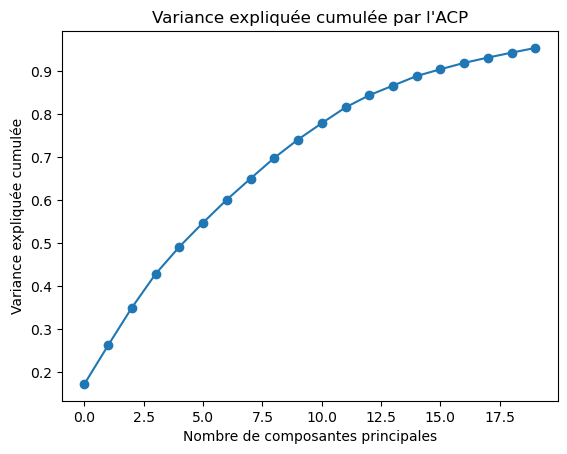

In [4]:
### Dans ce code mon objectif est donc de mettre en place une acp et de mettre en place une cisualistion de la variance en faisant
### la variance cumulée pour voir un potentiel coude sur le graphique et voir quelles sont les composantes principales

from sklearn.preprocessing import StandardScaler

X = data.drop('customer_id', axis=1)

# Mise en place de la normalisation (standardisation)
standard_scaler = StandardScaler()
X[['purchase_year', 'purchase_month']] = standard_scaler.fit_transform(X[['purchase_year', 'purchase_month']])

# Initialisation de PCA
pca = PCA(n_components=20)

# Appliquation de PCA à l'ensemble de données complet
X_pca = pca.fit_transform(X)

# Visualisation des proportions de variance expliquée
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Affichage des proportions de variance 
print("Proportion de variance expliquée par chaque composante principale:", explained_variance_ratio)
print("\nVariance expliquée cumulée:", cumulative_explained_variance)

# Visualisation de la variance cumulée
plt.plot(cumulative_explained_variance, marker='o')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance expliquée cumulée')
plt.title('Variance expliquée cumulée par l\'ACP')
plt.show()

On n'observe pas réellement de coude lors de l'analyse de notre ACP, par conséquent il n'est pas nécessaire de l'utiliser pour la suite de notre analyse.

## Test des algorithmes :

### K-means sans L'ACP

C:\Users\paulm\OneDrive\Documents\ana\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\paulm\OneDrive\Documents\ana\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


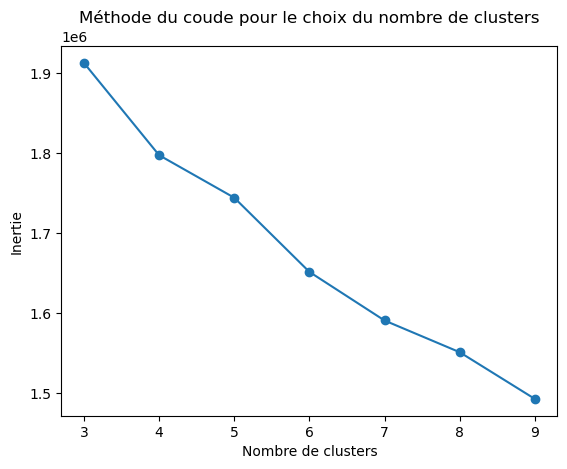

In [5]:
### Dans ce script l'ojectif et de faire un KMEANS pour différents K et le représenter graphiquement pour utiliser la méthode du coude

#Importation des librairies nécessaires
from sklearn.cluster import KMeans

# Choix du nombre de clusters en utilisant la méthode du coude
inertia_values = []
for k in range(3, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# On trace maintenant la courbe du coude
plt.plot(range(3, 10), inertia_values, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour le choix du nombre de clusters')
plt.show()

Comme nous pouvons le voir pour chaque K la courbe a tendance à diminuer même si on peut observer une accentuation de ce phénomène après un nombre de cluster de 5. 

In [25]:
from sklearn.cluster import KMeans

# Ici on choisit le nombre de clusters (par exemple, 5 clusters)
n_clusters = 5

# On applique l'algorithme K-means
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
data['cluster'] = kmeans.fit_predict(X)

# Et on affiche la distribution des clusters
print(data['cluster'].value_counts())

cluster
0    39195
3    33633
1    24620
5    15573
2     2039
4      549
Name: count, dtype: int64


Les clusters semblent relativement bien distribué ce qui est déjà une bonne chose.

In [7]:
# Visualisation des clusters
cluster_stats = X.groupby('cluster').mean()
print(cluster_stats)

            price  freight_value  payment_sequential  payment_installments  \
cluster                                                                      
0       -0.126955      -0.117029           -0.064039             -0.098712   
1       -0.135296      -0.188579           -0.045404              0.029291   
2        0.078265       0.175205           11.119667             -0.699813   
3       -0.186967      -0.258959           -0.048652             -0.169549   
4        1.523024       1.861790           -0.053591              0.742481   

         payment_value  review_score  product_name_lenght  \
cluster                                                     
0            -0.126340      0.004725             0.558798   
1            -0.137676      0.025124             0.187973   
2            -0.591659     -0.086063            -0.158783   
3            -0.173632      0.023667            -1.287855   
4             1.535805     -0.172770            -0.044491   

         product_descript

Grâce à cela nous pouvons voir comment les cluster sont fait et en apprendre un peu plus sur nos données.

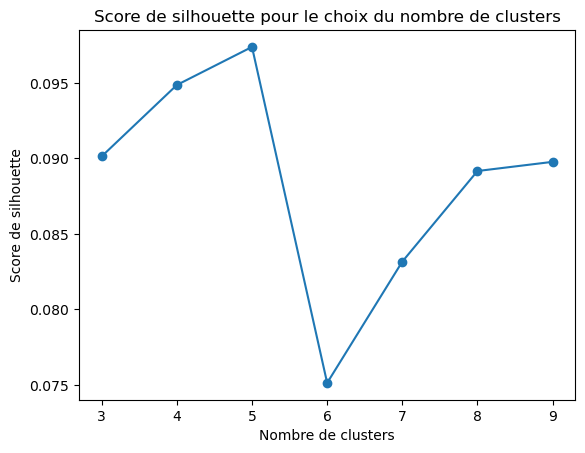

In [45]:
### Ici l'objectif est de mettre en place le score silhouette et de le visualiser en fonction du nombre de cluster de sorte à choisir
### notre K optimal

# Importation des librairies nécessaires
from sklearn.metrics import silhouette_score
from sklearn.utils import shuffle

# Calcul du score silhouette pour chaque nombre de clusters
silhouette_scores = []
for k in range(3, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)

# Représentation graphique de la courbe de silhouette
plt.plot(range(3, 10), silhouette_scores, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de silhouette')
plt.title('Score de silhouette pour le choix du nombre de clusters')
plt.show()

Ici on obtient le meilleur score pour un nombre de cluster de 5 qui est relativement cohérent vis à vis de la problématique métier. Il semblerait donc que le plus évident selon nos données serait de garder un nombre de cluster de 5.

Nous allons maintenant essayer de visualiser au mieux ces clusters de sortes à mieux les comprendre.

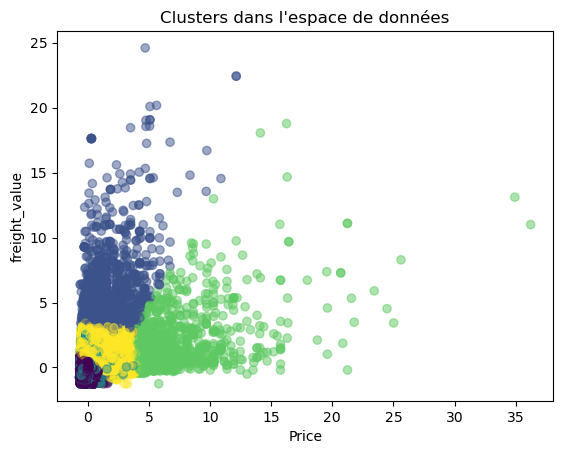

In [46]:
# Choix de notre nombre de cluster optimal
optimal_k = 5 

# Sélection des caractéristiques souhaitées (les plus représentatifs)
selected_features = ['price', 'review_score', 'freight_value']

# Nous pouvons maintenant extraire les données correspondantes
X_selected = X[selected_features].values

# On applique l'algorithme K-means avec le nombre optimal de clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_selected)

# Et maintenant la visualisation des clusters dans l'espace de nos données originales
plt.scatter(X_selected[:, 0], X_selected[:, 2], c=clusters, cmap='viridis', marker='o', alpha=0.5)
plt.title('Clusters dans l\'espace de données')
plt.xlabel('Price')
plt.ylabel('freight_value')
plt.show()

Grâce à ce graphique nous pouvons bien observer la distribution de nos cluster avec ces deux features.

Nous allons maintenant essayer de les visualiser en trois dimensions pour mieux comprendre encore une fois. 

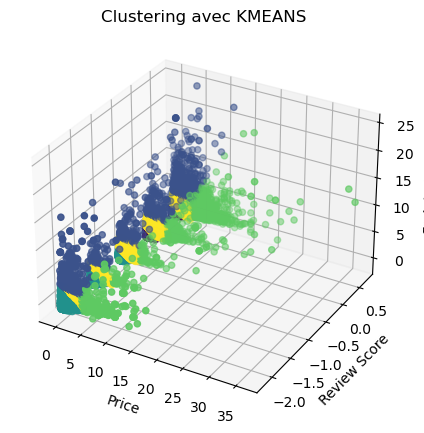

In [47]:
# Importation de la libraiirie Axes3D
from mpl_toolkits.mplot3d import Axes3D

# Visualisation en 3D avec scatter plot 3D
fig = plt.figure(figsize=(5, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_selected[:, 0], X_selected[:, 1], X_selected[:, 2], c=clusters, cmap='viridis')
ax.set_title('Clustering avec KMEANS')
ax.set_xlabel('Price')
ax.set_ylabel('Review Score')
ax.set_zlabel('Freight Value')
plt.show()

Encore une fois, nous observons une différenciation entre les clusters, même s'il semble clair que certains clusters sont proches, ce qui explique notre score de silhouette qui n'est pas extrêmement élevé.

### Visualisation

Je décide maintenant de passer à la visualisation de ces clusters afin de vraiment comprendre leur répartition.

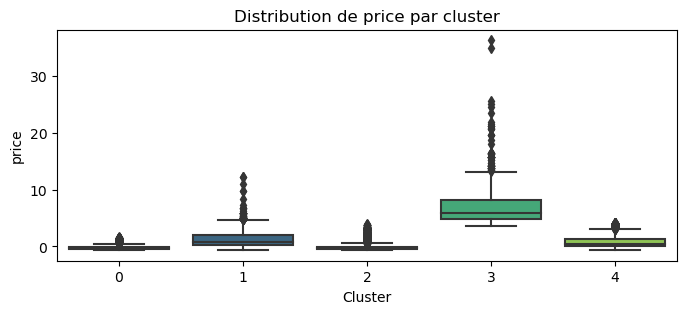

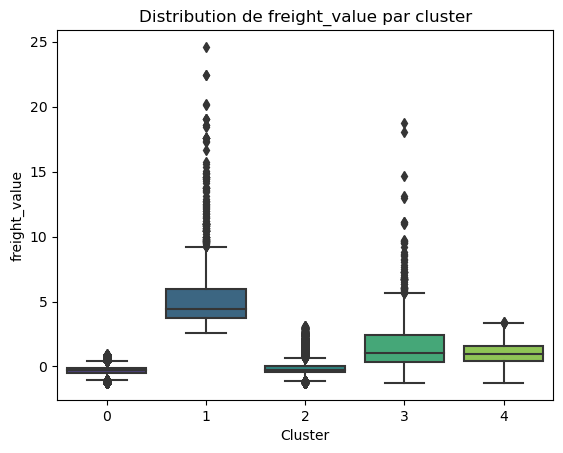

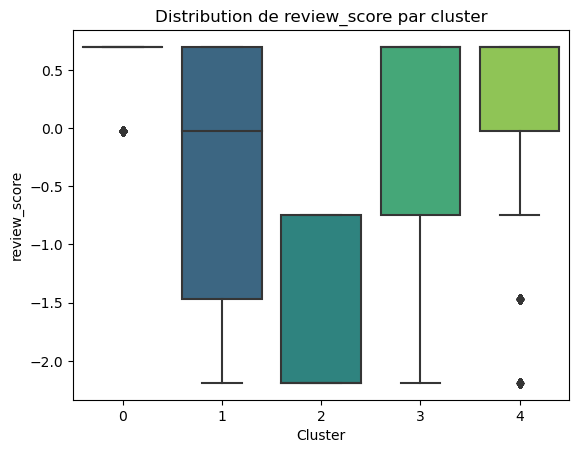

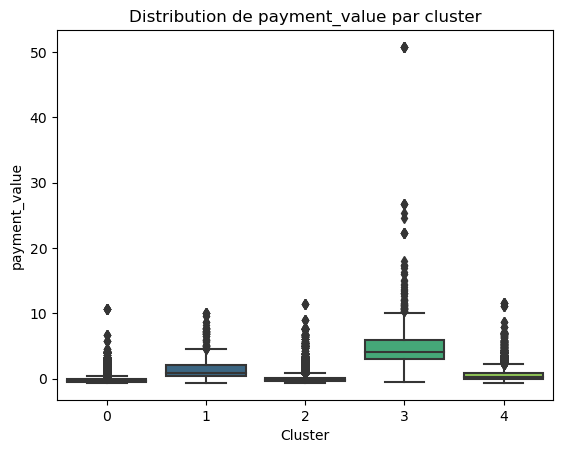

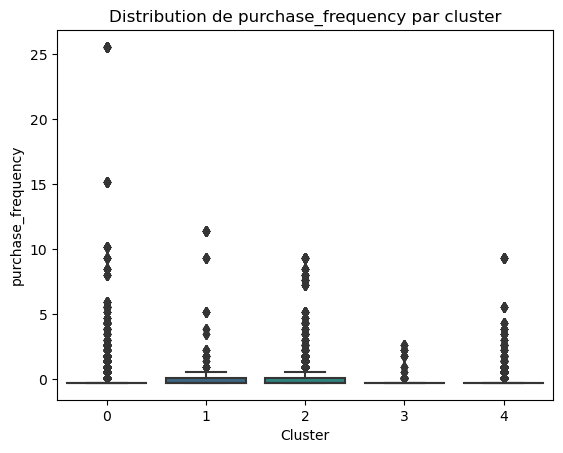

In [48]:
import seaborn as sns

X['cluster'] = clusters

# Sélection des quelques caractéristiques clés pour visualiser
selected_features = ['price', 'freight_value', 'review_score', 'payment_value','purchase_frequency' ]

# Création du diagramme en boîte pour chaque cluster
plt.figure(figsize=(8, 3))
for feature in selected_features:
    sns.boxplot(x='cluster', y=feature, data=X, palette='viridis')
    plt.title(f'Distribution de {feature} par cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.show()

Comme nous pouvons le voir, les clusters 1 et 3 semblent être des clusters où l'on retrouve une tendance plus élevée en termes de prix des produits commandés. De plus, ce sont également ceux où la valeur du fret est la plus importante (ce qui semble cohérent). Cependant, pour les notes, il semble que les clusters avec les meilleures notes données par les utilisateurs soient le cluster 4 et le 3. Enfin, nous observons que les clusters qui regroupent les clients les plus réguliers semblent être le cluster 1 et 2, même si ce n'est pas très différencié.

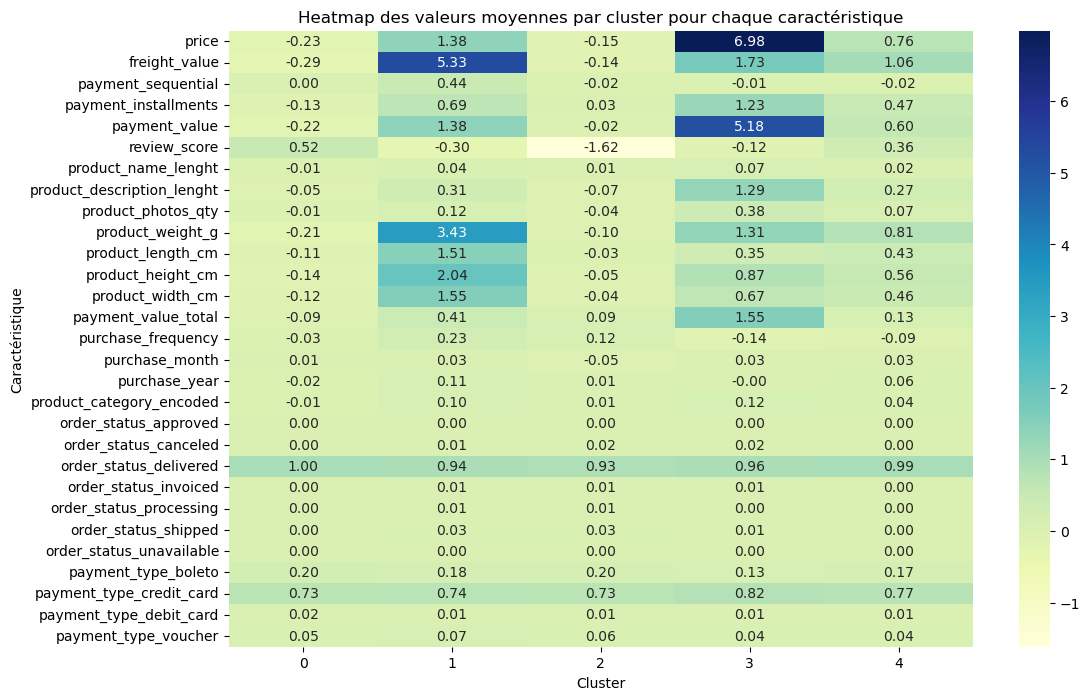

In [49]:
### L'objectif de ce script est de créer un heatmap ou table de corrélation de sortes à encore mieux visualiser les tendances

# Sélection des colonnes qui ne commencent pas par "seller_state" ou "customer_state"
X_filtered = X.loc[:, ~X.columns.str.startswith('seller_state')]
X_filtered = X_filtered.loc[:, ~X_filtered.columns.str.startswith('customer_state')]

cluster_stats = X_filtered.groupby('cluster').mean()

# On transpose le DataFrame des statistiques des clusters pour avoir les clusters en colonnes
cluster_stats_transposed = cluster_stats.T

# Création du heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_stats_transposed, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Heatmap des valeurs moyennes par cluster pour chaque caractéristique')
plt.xlabel('Cluster')
plt.ylabel('Caractéristique')
plt.show()

Encore une fois, cette visualisation nous permet d'en apprendre un peu plus sur la distribution des clients dans nos clusters. Comme nous l'avons vu tout à l'heure, il semble effectivement que les clusters 1 et 3 regroupent les clients qui ont tendance à payer plus cher, ce qui est surtout notable pour le cluster 3, qui rapporte beaucoup plus que les autres. Cependant, même si le cluster 1 rapporte beaucoup, il engendre également les frais de transport les plus élevés. Cela est notamment dû au fait que c'est le cluster dans lequel les clients ont le plus tendance à commander des produits plus imposants, que ce soit en termes de poids ou de taille.

Maintenant, nous pouvons nous intéresser au score de satisfaction des clients. En effet, les clusters donnant les meilleures satisfactions clients sont les clusters 0 et 4, et la moyenne la moins bonne est pour le cluster 2. De plus, les notes sont légèrement meilleures pour le cluster 3 que pour le 1.

On peut également noter que les clusters dans lesquels les clients ont le plus tendance à revenir sont les clusters 1 et 2.


Pour synthétiser ces informations nous pourrions classer ces clusters de la sortes : 
- cluster 0 : Loyalistes potentiels
- cluster 1 : Champions
- cluster 2 : A risque
- cluster 3 : A réactiver
- cluster 4 : Loyaux

#### Vérification de la stabilité des clusters à l'initialisation : 

In [51]:
### Dans ce script l'objectif est de tester la stabilité des clusters pour se faire nous allons utiliser le score de jaccard

from sklearn.metrics import jaccard_score
from sklearn.cluster import KMeans

# Ici nous avons le nombre de fois à exécuter l'algorithme de clustering avec différentes initialisations
num_runs = 5

# Ici c'est la liste pour stocker les labels de clusters pour chaque exécution
all_labels = []

# On exécute l'algorithme de clustering plusieurs fois
for _ in range(num_runs):
    kmeans = KMeans(n_clusters=optimal_k, random_state=None, n_init = 10 ) 
    labels = kmeans.fit_predict(X_selected)
    all_labels.append(labels)

# On calcule maintenant les scores de similarité entre les paires de labels de clusters
similarities = []
for i in range(num_runs):
    for j in range(i+1, num_runs):
        similarity = jaccard_score(all_labels[i], all_labels[j], average='macro')
        similarities.append(similarity)

# Et enfin on calcule la mesure agrégée de stabilité des clusters à l'initialisation
stability_score = np.mean(similarities)  

print("Mesure agrégée de stabilité des clusters à l'initialisation:", stability_score)

Mesure agrégée de stabilité des clusters à l'initialisation: 0.4520977682290878


On peut donc voir ici que ce score indique une stabilité modérée dans la formation des clusters entre différentes initialisations. Cela signifie que les clusters obtenus lors de différentes exécutions de l'algorithme de clustering sont relativement similaires les uns aux autres. 

### DBSCAN

Je décide également de tester l'algorythme DBSCAN pour voir si il est capable de mieux gérer mes données ou non : 

In [15]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import davies_bouldin_score

# On défini une grille de valeurs pour les hyperparamètres epsilon et min_samples
eps_values = [0.1, 0.5, 1.0]
min_samples_values = [4,15,18]

best_score = float('inf')  # Initialisation avec une valeur très grande
best_params = {}

# On fait une boucle sur toutes les combinaisons d'hyperparamètres
for eps in eps_values:
    for min_samples in min_samples_values:
        # Initialisation de DBSCAN avec les valeurs d'hyperparamètres actuelles
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        
        # Ajustement de DBSCAN aux données
        dbscan.fit(X)
        
        # Calcul de l'indice de Davies-Bouldin
        db_score = davies_bouldin_score(X, dbscan.labels_)
        
        # Choix de la métrique à utiliser
        score = db_score 
        
        # Mise à jour des meilleurs paramètres si le score actuel est meilleur
        if score < best_score:
            best_score = score
            best_params = {'eps': eps, 'min_samples': min_samples}

print("Meilleurs hyperparamètres:", best_params)
print("Meilleur score:", best_score)

Meilleurs hyperparamètres: {'eps': 0.1, 'min_samples': 15}
Meilleur score: 0.38995900767670877


Les hyperparamètres pertinents de l'algorithme DBSCAN ont été optimisés en utilisant une recherche sur la grille ( eps_values = [0.1, 0.5, 1.0] min_samples_values = [4,15,18]). Nous avons pu tester différentes valeurs pour eps et min_samples, et sélectionné les valeurs qui ont donné le meilleur score de Davies-Bouldin. Les meilleurs hyperparamètres trouvés sont eps=0.1 et min_samples=15, avec un score de de 0.398.

In [16]:
from sklearn.cluster import DBSCAN

# Ici nous mettons les meilleurs hyperparamètres
eps = 0.1
min_samples = 15

# Initialisation de DBSCAN avec les valeurs choisies
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# Ajustement de DBSCAN aux données
dbscan.fit(X)

# obtention des étiquettes des clusters
labels = dbscan.labels_

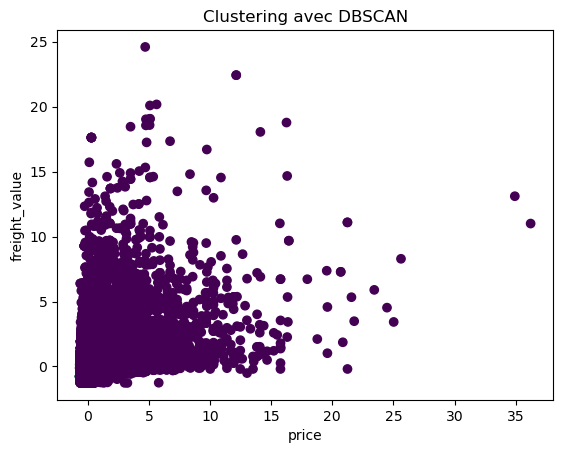

Nombre de clusters: 5


In [18]:
### Nous pouvons maintenant passer à la visualisation de nos cluster, nous allons faire comme précédement mais cette fois si pour DBSCAN

# Utilisation des noms de colonnes pour accéder aux données
plt.scatter(X['price'], X['freight_value'], c=labels, cmap='viridis')
plt.title('Clustering avec DBSCAN')
plt.xlabel('price')
plt.ylabel('freight_value')
plt.show()

# Ajustement de DBSCAN aux données
dbscan.fit(X)

# Obtention des étiquettes de cluster
labels = dbscan.labels_

# Affichage du nombre de clusters formés (excluant les points aberrants)
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Nombre de clusters:", num_clusters)

Comme nous pouvons le voir en utilisabt les même features les résultats sont beaucoup moins cohérent qu'avec notre algorythme KMEANS. Nous allons tout de même tenter de le visualiser en 3 dimensions pour voir si cela semble plus clair.

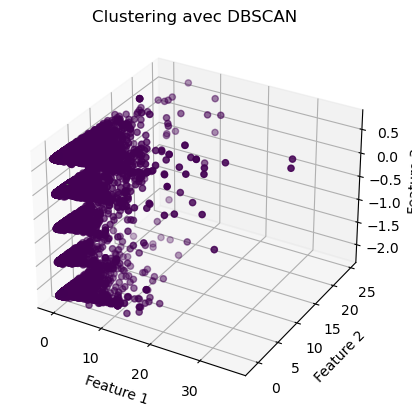

In [19]:
#Importation de la librairie nécessaire pour une visualisation en trois dimensions
from mpl_toolkits.mplot3d import Axes3D

# Visualisation en 3D avec scatter plot 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['price'], X['freight_value'], X['review_score'], c=labels, cmap='viridis')
ax.set_title('Clustering avec DBSCAN')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.show()

Comme on peut le voir avec nos visualisations graphiques et malgré le fait qu'il ait comptabilisé 5 clusters, la répartition n'est pas aussi claire qu'avec notre KMeans, du moins visuellement. C'est pourquoi nous n'allons pas utiliser cet algorithme et préférer le KMeans pour notre projet.

### Comparaison des résultats :

In [20]:
from sklearn.metrics import calinski_harabasz_score

# Calcul de l'indice de Calinski-Harabasz
ch_score = calinski_harabasz_score(X, dbscan.labels_)

print("Score de l'indice de Calinski-Harabasz:", ch_score)

Score de l'indice de Calinski-Harabasz: 255.8252404903196


In [52]:
import time
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import KMeans, DBSCAN

# Initialisation de KMeans avec le nombre de clusters optimal (que nous avons trouvé précédemment)
kmeans = KMeans(n_clusters=5, random_state=42, n_init = 10)

# Ajustement de KMeans aux données
start_time_kmeans = time.time()
kmeans.fit(X)
end_time_kmeans = time.time()
execution_time_kmeans = end_time_kmeans - start_time_kmeans

# Obtention des étiquettes des clusters
labels_kmeans = kmeans.labels_

# Calcul des indices de Davies-Bouldin et de Calinski-Harabasz pour le KMeans
kmeans_db_scores = davies_bouldin_score(X, labels_kmeans)
kmeans_ch_scores = calinski_harabasz_score(X, labels_kmeans)

# Initialisation de DBSCAN avec les valeurs choisies
eps = 0.1
min_samples = 15
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# Ajustement de DBSCAN aux données
start_time_dbscan = time.time()
dbscan.fit(X)
end_time_dbscan = time.time()
execution_time_dbscan = end_time_dbscan - start_time_dbscan

# Obtention des étiquettes des clusters
labels_dbscan = dbscan.labels_

# Calcul des indices de Davies-Bouldin et de Calinski-Harabasz pour le DBSCAN
dbscan_db_scores = davies_bouldin_score(X, labels_dbscan)
dbscan_ch_scores = calinski_harabasz_score(X, labels_dbscan)

# Obtention du nombre de clusters formés
num_clusters_kmeans = len(set(labels_kmeans))
num_clusters_dbscan = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)

# Stockage des résultats dans un DataFrame
results = pd.DataFrame({
    'Algorithme': ['KMeans', 'DBSCAN'],
    'Davies-Bouldin': [kmeans_db_scores, dbscan_db_scores],
    'Calinski-Harabasz': [kmeans_ch_scores, dbscan_ch_scores],
    'Nombre de clusters': [num_clusters_kmeans, num_clusters_dbscan],
    'Temps d\'exécution (s)': [execution_time_kmeans, execution_time_dbscan]
})

# Visualisation
results

,Algorithme,Davies-Bouldin,Calinski-Harabasz,Nombre de clusters,Temps d'exécution (s)
0,KMeans,2.132708,10849.018484,5,3.146260
1,DBSCAN,0.389959,255.825240,5,17.352132


En résumé, selon l'indice Davies-Bouldin, DBSCAN semble offrir de meilleurs résultats de clustering, tandis que selon l'indice Calinski-Harabasz, KMeans semble meilleur. Cependant, il est important de considérer également d'autres facteurs tels que le temps d'exécution, mais également la distribution des données dans les clusters créés. C'est pourquoi, pour la suite de notre projet, nous allons préférer l'utilisation de l'algorithme KMeans, qui est plus stable et cohérent avec la problématique métier.

#### Utilisation de RFM

Pour nous donner une autre idée, nous allons essayer de faire de même avec notre DataFrame RFM que nous avons créé précédemment (dans le notebook d'analyse exploratoire).

In [41]:
# Importation dde notre fichier
rfm_data = pd.read_csv("rfm_data.csv")
rfm_data

,customer_id,recency,frequency,monetary,R_Score,F_Score,M_Score,RFM_Score,RFM_Segment
0,00012a2ce6f8dcda20d059ce98491703,322,1,89.80,4,2,3,9,Loyaux
1,000161a058600d5901f007fab4c27140,448,1,54.90,5,2,2,9,Loyaux
2,0001fd6190edaaf884bcaf3d49edf079,590,1,179.99,5,2,5,12,Champions
3,0002414f95344307404f0ace7a26f1d5,398,1,149.90,4,2,4,10,Loyaux
4,000379cdec625522490c315e70c7a9fb,186,1,93.00,2,2,3,7,Loyalistes potentiels
...,...,...,...,...,...,...,...,...,...
96511,fffcb937e9dd47a13f05ecb8290f4d3e,209,1,78.00,2,2,3,7,Loyalistes potentiels
96512,fffecc9f79fd8c764f843e9951b11341,189,1,164.70,2,2,4,8,Loyalistes potentiels
96513,fffeda5b6d849fbd39689bb92087f431,130,1,47.90,1,2,2,5,A réactiver
96514,ffff42319e9b2d713724ae527742af25,120,1,199.90,1,2,5,8,Loyalistes potentiels


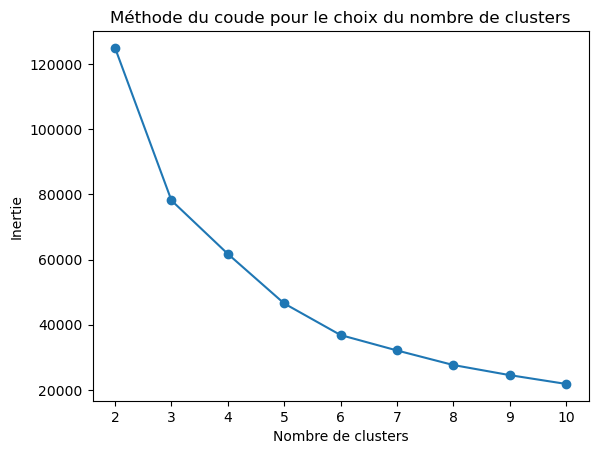

In [42]:
from sklearn.preprocessing import StandardScaler

# Suppresion des colonnes non intéressantes
df_clustering = rfm_data.drop(['customer_id', 'RFM_Segment', 'R_Score','F_Score','M_Score','RFM_Score'], axis=1)

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clustering)

# Calcul de l'inertie pour chaque nombre de clusters
inertia_values = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

# Création de la courbe du coude
plt.plot(range(2, 11), inertia_values, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour le choix du nombre de clusters')
plt.show()

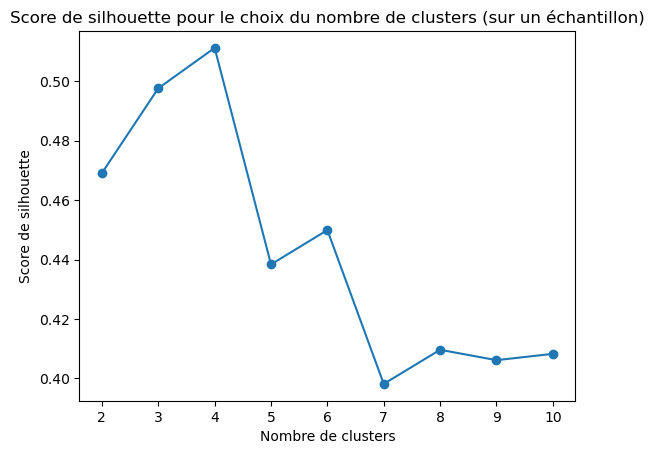

In [43]:
from sklearn.metrics import silhouette_score
from sklearn.utils import shuffle

# Mélange des données pour obtenir un échantillon aléatoire
X_shuffled = shuffle(X_scaled, random_state=42)

# Définition de la taille de l'échantillon
sample_size = 10000 

# Calcul du score de silhouette pour chaque nombre de clusters
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_shuffled[:sample_size])
    silhouette_avg = silhouette_score(X_shuffled[:sample_size], labels)
    silhouette_scores.append(silhouette_avg)

# Création de la courbe du score de silhouette
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de silhouette')
plt.title('Score de silhouette pour le choix du nombre de clusters (sur un échantillon)')
plt.show()

En effet nous obtenons forcément des meilleurs score mais le nombre de cluster idéal est 4 cette fois ci.

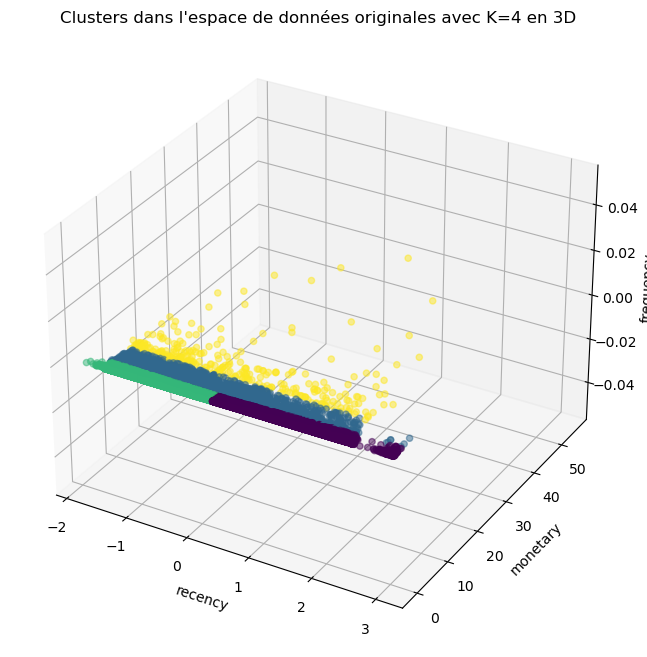

In [44]:
from mpl_toolkits.mplot3d import Axes3D

# On applique l'algorithme K-means avec le nombre optimal de clusters
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Visualisation en 3D avec scatter plot 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_scaled[:, 0], X_scaled[:, 2], X_scaled[:, 1], c=clusters, cmap='viridis', marker='o', alpha=0.5)
ax.set_xlabel('recency')
ax.set_ylabel('monetary')
ax.set_zlabel('frequency')
ax.set_title('Clusters dans l\'espace de données originales avec K=4 en 3D')
plt.show()

Et maintenant, nous pouvons observer la répartition des clusters selon ces caractéristiques. En effet, cela semble beaucoup plus net grâce au prétraitement en amont.

## Conclusion 

Pour conclure, à la suite de nos différents essais, nous avons constaté que le nombre de clusters idéal était de 5 que ce soit avec le KMEANS ou le DBSCAN, ce qui est cohérent avec la problématique métier. De plus, l'algorithme le plus optimisé selon nos critères est bien le KMeans. Nous avons également pu décrire un peu mieux les clusters et comprendre leur distribution. Voici ce que nous en retirons, comme nous avons pu le voir précédemment :

- Cluster 0 : Loyalistes potentiels
- Cluster 1 : Champions
- Cluster 2 : À risque
- Cluster 3 : À réactiver
- Cluster 4 : Loyaux

Nous allons maintenant passer à l'étape de maintenance pour essayer de voir comment nous pouvons quantifier les potentielles maintenances périodiques.